# Load the libraries

In [1]:
from pycaret.classification import *
import numpy as np
import pandas as pd

# Load the data

In [2]:
# Create a path to the data directory
path_data = "../data/final/"

In [4]:
# Dataframe for training
df_train = pd.read_csv(path_data + "df_train_balanced.csv", parse_dates=["time"])

# Dataframe for testing
df_test = pd.read_csv(path_data + "df_test_balanced.csv", parse_dates=["time"])

In [11]:
# Count the number of occurrences for each value in the FireMask column
print("The number of occurrences for each value in the FireMask column for the training data:")
print(df_train["FireMask"].value_counts())
print("The number of occurrences for each value in the FireMask column for the testing data:")
print(df_test["FireMask"].value_counts())

The number of occurrences for each value in the FireMask column for the training data:
0.0    14970
1.0     7485
Name: FireMask, dtype: int64
The number of occurrences for each value in the FireMask column for the testing data:
0.0    3368
1.0    1684
Name: FireMask, dtype: int64


# Setup the environment

In [14]:
# Initialize the setup with pycaret for the training data. Get the all set up for the training data
clf1 = setup(data=df_train, target="FireMask", session_id=123,remove_outliers= True,normalize=True,  silent=True )

,Description,Value
0,session_id,123
1,Target,FireMask
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(22455, 17)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


2022/11/15 15:11:11 INFO mlflow.tracking.fluent: Experiment with name 'wildfire' does not exist. Creating a new experiment.


# Compare the models

In [16]:
# Compare the models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9750,0.9958,0.9842,0.9437,0.9635,0.9444,0.9450,0.4410
catboost,CatBoost Classifier,0.9724,0.9951,0.9785,0.9417,0.9597,0.9387,0.9392,5.2120
rf,Random Forest Classifier,0.9709,0.9958,0.9633,0.9507,0.9569,0.9349,0.9350,0.2110
et,Extra Trees Classifier,0.9677,0.9948,0.9461,0.9574,0.9517,0.9274,0.9275,0.1400
lightgbm,Light Gradient Boosting Machine,0.9661,0.9932,0.9711,0.9310,0.9506,0.9248,0.9253,0.0600
dt,Decision Tree Classifier,0.9563,0.9569,0.9587,0.9153,0.9365,0.9032,0.9038,0.0350
gbc,Gradient Boosting Classifier,0.8962,0.9538,0.8346,0.8532,0.8437,0.7660,0.7662,0.5560
knn,K Neighbors Classifier,0.8778,0.9432,0.8791,0.7834,0.8285,0.7340,0.7370,0.4340
ada,Ada Boost Classifier,0.8517,0.9235,0.7219,0.8154,0.7657,0.6578,0.6605,0.1420
lda,Linear Discriminant Analysis,0.8247,0.8843,0.7002,0.7592,0.7281,0.5992,0.6006,0.0280


We are particularly interested in tthe F1 score, which is the harmonic mean of precision and recall. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
$$F1 = 2 \frac{precision \times recall}{precision + recall}$$
We will keep the lightgbm model as it has the high score for F1 and is fast to train.

# Create the model

In [18]:
# Create a model from lightgbm
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9699,0.9956,0.9681,0.9437,0.9558,0.9329,0.9331
1,0.9705,0.9939,0.9781,0.9370,0.9571,0.9347,0.9352
2,0.9652,0.9938,0.9800,0.9212,0.9497,0.9231,0.9241
3,0.9645,0.9919,0.9780,0.9211,0.9487,0.9216,0.9226
4,0.9645,0.9935,0.9661,0.9308,0.9481,0.9211,0.9215
5,0.9625,0.9906,0.9681,0.9238,0.9454,0.9169,0.9175
6,0.9732,0.9947,0.9780,0.9441,0.9608,0.9404,0.9408
7,0.9625,0.9909,0.9681,0.9238,0.9454,0.9169,0.9175
8,0.9625,0.9923,0.9661,0.9254,0.9453,0.9168,0.9173


In [19]:
# Tune the model
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9786,0.9972,0.9821,0.9554,0.9686,0.9523,0.9525
1,0.9819,0.9982,0.9900,0.9576,0.9736,0.9598,0.9601
2,0.9779,0.9972,0.9880,0.9483,0.9677,0.9509,0.9514
3,0.9739,0.9957,0.9840,0.9408,0.9620,0.9421,0.9426
4,0.9759,0.9955,0.9760,0.9532,0.9645,0.9462,0.9464
5,0.9725,0.9939,0.9760,0.9440,0.9598,0.9389,0.9392
6,0.9792,0.9966,0.9860,0.9537,0.9696,0.9538,0.9541
7,0.9772,0.9954,0.9760,0.9569,0.9664,0.9492,0.9493
8,0.9812,0.9977,0.9860,0.9592,0.9724,0.9582,0.9584


## Analyze the model

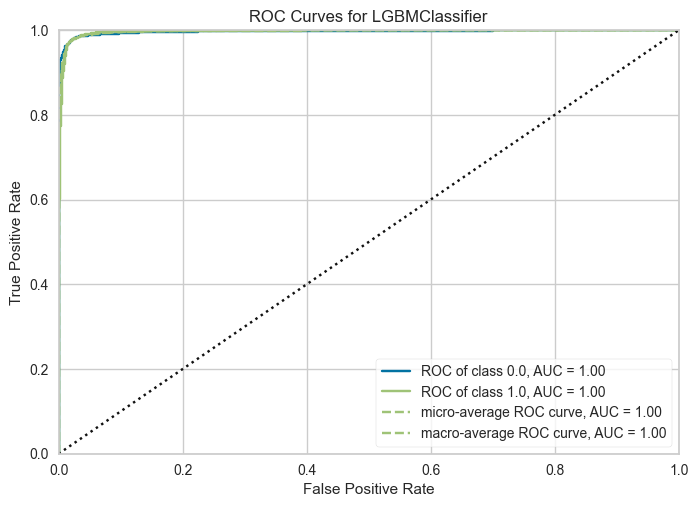

In [20]:
# Plot the model
plot_model(tuned_lightgbm, plot = 'auc')

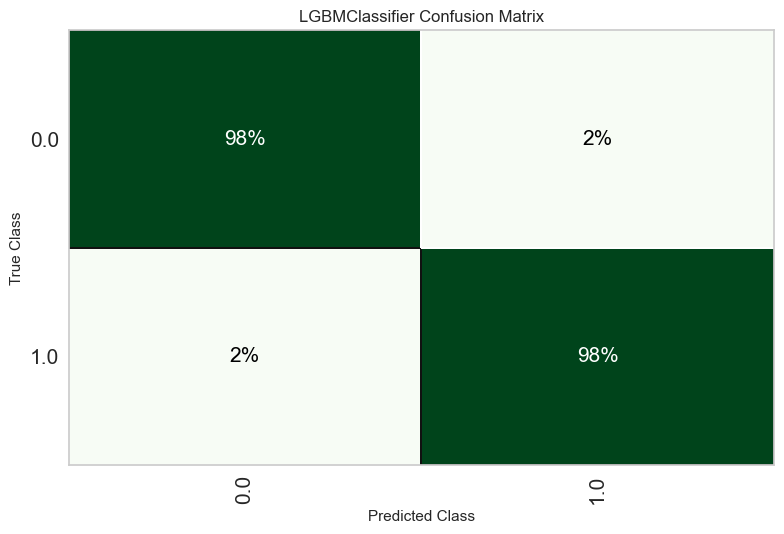

In [24]:
# Plot the confusion matrix with percentage with the test data
plot_model(tuned_lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

## Interpret the model

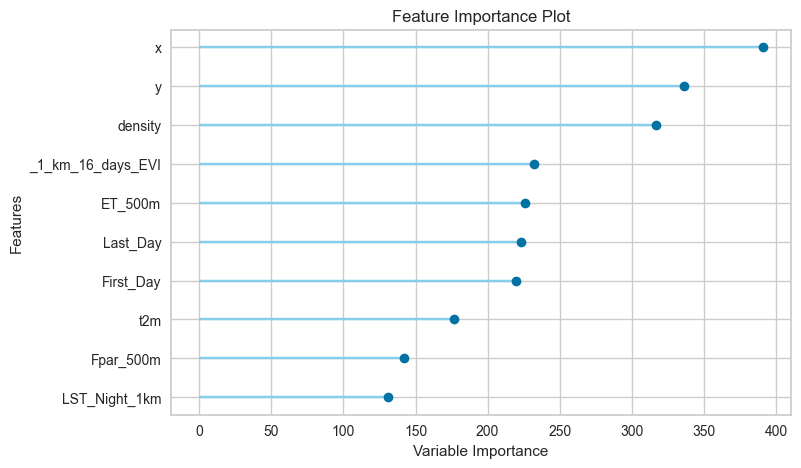

In [25]:
# Plot the feature importance
plot_model(tuned_lightgbm, plot = 'feature')

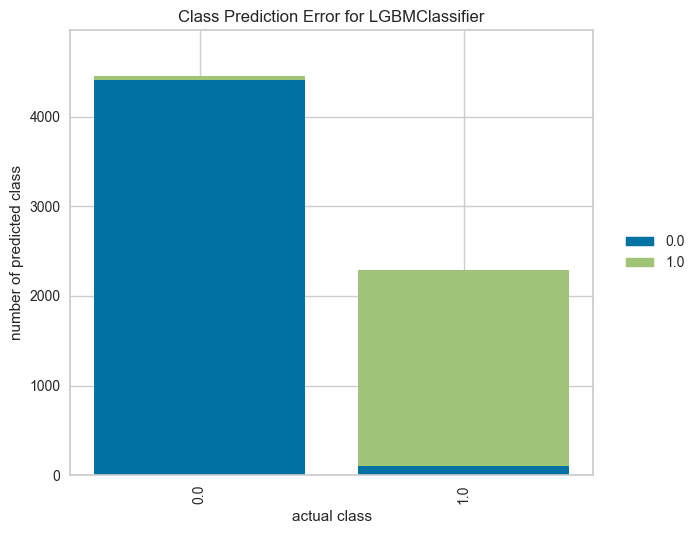

In [27]:
# Plot the shap values
plot_model(tuned_lightgbm, plot = 'error')

In [21]:
# Evaluate the model
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

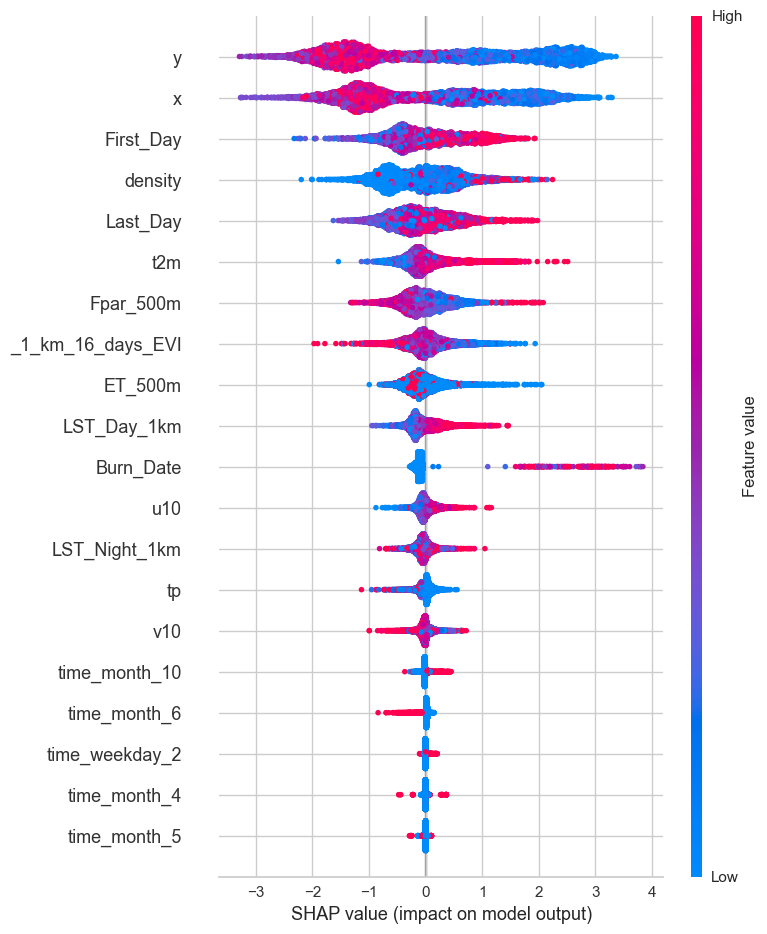

In [28]:
# interpret the model
interpret_model(tuned_lightgbm)

In [45]:
# Predict the model
predict_model(tuned_lightgbm, data=df_test, probability_threshold=0.1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7933,0.8196,0.5546,0.7606,0.6415,0.5013,0.5136


,x,y,time,ET_500m,Fpar_500m,density,u10,v10,t2m,tp,First_Day,Last_Day,Burn_Date,FireMask,LST_Day_1km,LST_Night_1km,_1_km_16_days_EVI,Label,Score
0,4.248393,44.678641,2020-04-01,11.1,0.560117,38.373775,0.112596,-0.796351,278.124949,9.313226e-07,79.000000,145.000000,0.0,1.0,288.403970,278.873742,0.302781,1.0,0.4396
1,4.248393,44.668732,2020-04-01,10.2,0.477539,53.474720,0.114974,-0.803155,278.296409,9.313226e-07,79.000000,145.000000,0.0,1.0,287.130328,278.384701,0.238188,1.0,0.6646
2,4.258302,44.678641,2020-04-01,11.8,0.578867,96.905205,0.112596,-0.796351,278.124949,9.313226e-07,79.250000,145.000000,0.0,1.0,289.241663,278.969767,0.318281,1.0,0.1962
3,4.258302,44.668732,2020-04-01,10.1,0.527363,99.127525,0.114974,-0.803155,278.296409,9.313226e-07,79.250000,145.000000,0.0,1.0,288.277979,278.636291,0.269137,1.0,0.2754
4,4.297939,43.677804,2019-07-24,16.5,0.464062,85.673035,0.520824,0.637497,298.254190,0.000000e+00,182.741935,258.000000,0.0,1.0,311.960000,295.474727,0.273025,1.0,0.3522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,4.773584,44.678641,2019-10-18,6.8,0.789844,33.638462,-0.240407,1.955596,287.956708,1.466043e-03,272.000000,337.000000,0.0,0.0,283.944178,271.379590,0.340537,0.0,0.9875
5048,4.456488,44.074175,2018-10-03,18.5,0.727031,15.032472,-0.549941,-5.768620,287.675133,9.313226e-07,253.516129,322.451613,0.0,0.0,296.940000,289.080000,0.413687,0.0,0.9959
5049,6.150973,43.697623,2019-08-09,11.1,0.638672,4.323791,0.208449,0.309687,293.797361,0.000000e+00,198.741935,269.500000,0.0,0.0,306.520000,292.920000,0.375550,0.0,0.9880
5050,5.150137,44.421000,2019-09-08,13.2,0.572344,6.360006,0.584963,-2.844975,286.988848,4.620700e-06,228.350000,292.550000,0.0,0.0,296.555381,286.488526,0.369087,0.0,0.9989


In [43]:
# Compute the predictions for different probability thresholds and find the one with the highest score of F1
thresholds = np.arange(0.1, 0.9, 0.1)
for i in thresholds:
    predictions = predict_model(tuned_lightgbm, data=df_test, probability_threshold=i)
    print("The F1 score for the probability threshold of {} is {}".format(i, predictions["Score"].mean()))

TypeError: probability_threshold parameter only accepts value between 0 to 1.

In [35]:
# Plot the confusion matrix with percentage with the test data
plot_model(tuned_lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True}, data=df_test)

TypeError: plot_model() got an unexpected keyword argument 'data'

# Deploy the model

In [31]:
# Finalize the model
final_lightgbm = finalize_model(tuned_lightgbm)

In [32]:
# Save the model
save_model(final_lightgbm, model_name = "final_lightgbm")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='FireMask',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.4,
                                 max_depth=-1, min_child_samples=6,
                                 min_child_weight=0.

In [ ]:
# Load the model
saved_final_lightgbm = load_model("final_lightgbm")